In [4]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
import random
import pylab
import networkx as nx

In [5]:

# Subway network
# suppose that there are five station

SB_NUM = 5
SB_NET = pd.DataFrame({'SUB_O': np.repeat(range(1, SB_NUM + 1), SB_NUM), 
                       'SUB_D': list(range(1, SB_NUM+1)) * SB_NUM,
                       'SUB_T' :[random.randint(1, 100) for x in range(SB_NUM * SB_NUM)],
                       'SUB_M': [random.randint(5,10) for x in range(SB_NUM * SB_NUM)]
})

# Build subway graph and plot
G = nx.from_pandas_edgelist(SB_NET, 'SUB_O', 'SUB_D',['SUB_T', 'SUB_M'], create_using = nx.DiGraph())

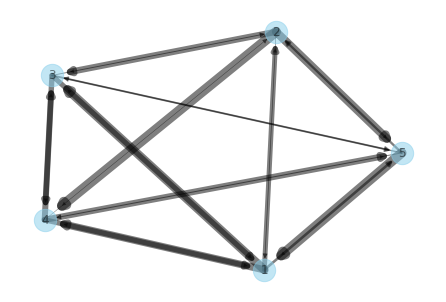

In [7]:
pos = nx.spring_layout(G)
pylab.figure(1)
nx.draw(G, pos, with_labels = True, node_size = 500, node_color = 'skyblue', node_shape = "o", alpha = 0.5,
    width = SB_NET['SUB_T']/ 10)

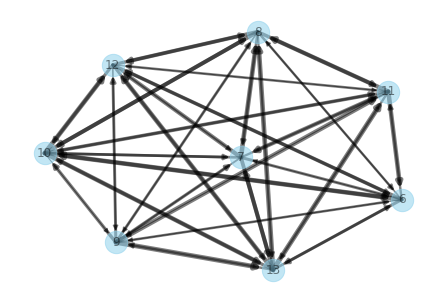

In [13]:
# EV netwokrbens  应该是为了换乘，即模型本身的目标而设定的
# 同样，就是引入换乘站，在上图中进行追加，注意list * num的含义，不是扩大list其中的内容，而是加长list

EV_NUM = 8
EV_NET = pd.DataFrame({'EV_O': np.repeat(range(SB_NUM+1, EV_NUM+SB_NUM + 1),EV_NUM),
                      'EV_D': list(range(SB_NUM+1, EV_NUM+SB_NUM + 1)) * EV_NUM,
                       'EV_T': [random.randint(10, 50) for x in range(EV_NUM * EV_NUM)],
                       'EV_M' : [random.randint(20, 50) for x in range(EV_NUM * EV_NUM)]
                      })


# Build EV graph and plot

G = nx.from_pandas_edgelist(EV_NET, 'EV_O', 'EV_D', ['EV_T', 'EV_M'], create_using = nx.DiGraph())

#plot
pos = nx.spring_layout(G)
pylab.figure(1)
nx.draw(G, pos, with_labels = True, node_size = 500, node_color = "skyblue", node_shape = "o", alpha =0.5,
       width = EV_NET['EV_T'] / 10)

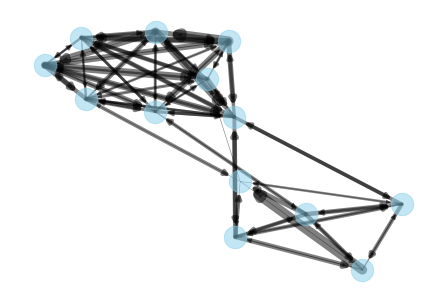

In [20]:
# 中间连接层的构建
EV_SB = pd.DataFrame({'ADJ_O': [1, 1, 6, 7, 3, 4, 12, 12, 2, 9],
                     'ADJ_D':[6, 7, 1, 1, 12, 12,3, 4, 9 ,2],
                     'ADJ_T': [random.randint(1, 5) for x in range(10)], 
                     'ADJ_M': [random.randint(1,2) for x in range(10)]})
# Merge three netwrok into one

npCombined_Net = np.concatenate([EV_SB.values, EV_NET.values, SB_NET.values], axis = 0)
Combined_Net = pd.DataFrame(npCombined_Net, 
                            columns = ["COM_O", "COM_D", "COM_T", "COM_M"],
                           ) 

G = nx.from_pandas_edgelist(Combined_Net, 'COM_O', 'COM_D', ['COM_T', 'COM_M'], create_using=nx.DiGraph())


# plot
pos = nx.spring_layout(G)
pylab.figure(1)
nx.draw(G, pos, with_label = True, node_size =500, node_color = "skyblue", node_shape="o", alpha = 0.5,
       width = Combined_Net['COM_T'] / 10)


# 

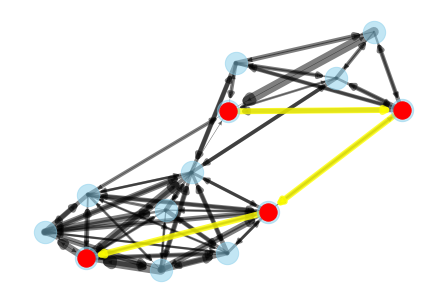

In [27]:
# 中间层连接完毕之后，计算最短路，并绘制路径

origin_node = 1
destination_node = 10

# calculate the shortest path using the weight of Money or time

distance = nx.shortest_path_length(G, origin_node, destination_node, weight = 'COM_M')
path = nx.shortest_path(G, source = origin_node, target = destination_node, weight = 'COM_M')

# plot
# plot the whole raw network
G = nx.from_pandas_edgelist(Combined_Net, 'COM_O', 'COM_D', ['COM_T', 'COM_M'], create_using = nx.DiGraph())
pos = nx.spring_layout(G)

pylab.figure(1)
nx.draw(G, pos, with_label = True, node_size = 500, node_color="skyblue", node_shape="o",alpha =0.5,
        width = Combined_Net['COM_T'] / 10)

# Plot the shortest path
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color = 'r')
nx.draw_networkx_edges(G, pos, edgelist = path_edges, edge_color = 'yellow', width = 6, alpha=0.8)
